In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, Xception, DenseNet201
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping


# utility libraries
import os
import time
import itertools

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_xception.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.2
best_batch_size	= 16
best_epochs	= 5


base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = Dropout(best_dropout)(x)

# final softmax probabilistic classification layer
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6102 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/5


/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 603ms/step - accuracy: 0.5297 - loss: 1.4898 - val_accuracy: 0.6523 - val_loss: 0.9708
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 111s 583ms/step - accuracy: 0.7884 - loss: 0.7063 - val_accuracy: 0.6705 - val_loss: 0.9042
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 113s 591ms/step - accuracy: 0.8627 - loss: 0.4929 - val_accuracy: 0.6864 - val_loss: 0.8704
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 112s 589ms/step - accuracy: 0.8896 - loss: 0.4216 - val_accuracy: 0.6955 - val_loss: 0.8669
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 114s 598ms/step - accuracy: 0.9052 - loss: 0.3650 - val_accuracy: 0.6977 - val_loss: 0.8831


# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 564ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.707317,0.725000,0.716049,40.000000
american_house_spider,0.903226,0.700000,0.788732,40.000000
bedbug,0.571429,0.700000,0.629213,40.000000
brown_stink_bug,0.780488,0.800000,0.790123,40.000000
carpenter_ant,0.607843,0.775000,0.681319,40.000000
cellar_spider,0.861111,0.775000,0.815789,40.000000
flea,0.333333,0.400000,0.363636,40.000000
house_centipede,0.902439,0.925000,0.913580,40.000000
silverfish,0.761905,0.800000,0.780488,40.000000
subterranean_termite,0.720000,0.450000,0.553846,40.000000


<Figure size 800x600 with 0 Axes>

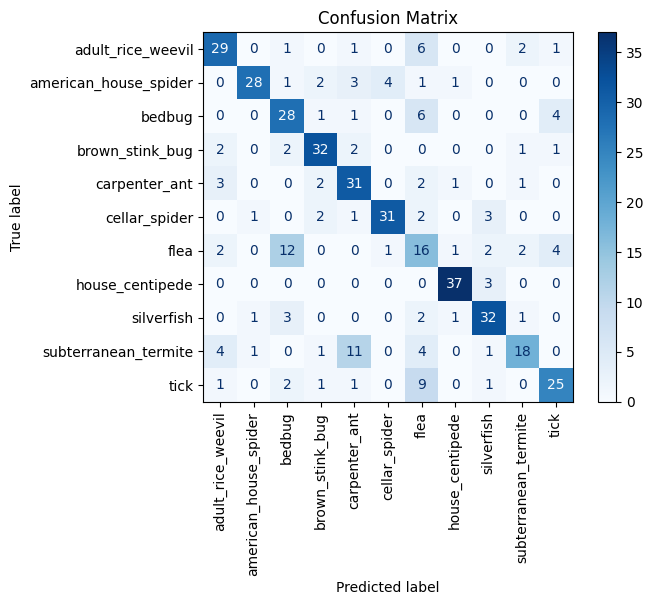

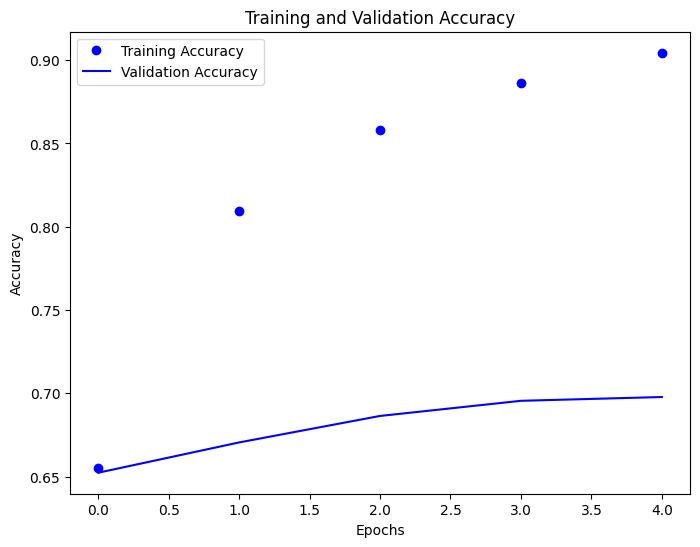

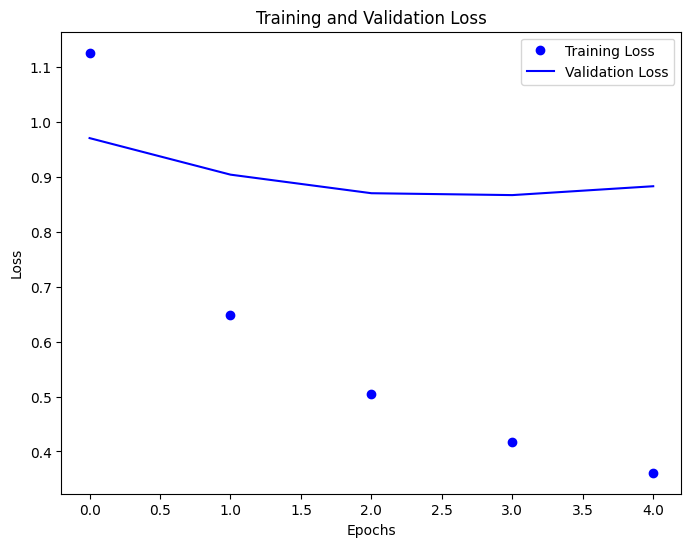

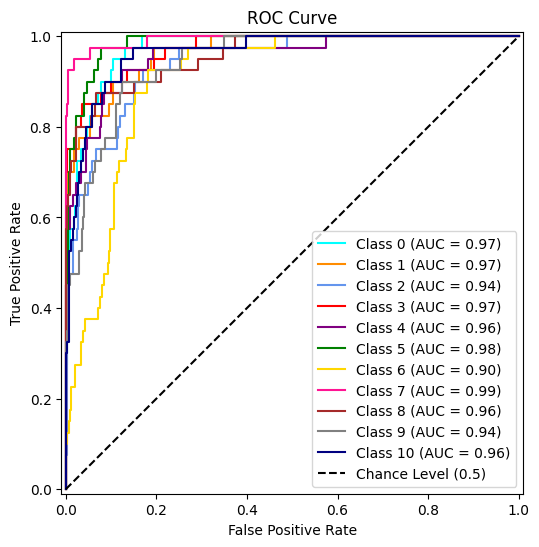

Macro-averaged One-vs-One ROC AUC score: 0.96
Accuracy: 0.698
Precision: 0.715
Recall: 0.698
F1 Score: 0.7


{'accuracy': 0.698,
 'precision': 0.715,
 'recall': 0.698,
 'f1_score': 0.7,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.707317  0.725000  0.716049   40.000000
 american_house_spider   0.903226  0.700000  0.788732   40.000000
 bedbug                  0.571429  0.700000  0.629213   40.000000
 brown_stink_bug         0.780488  0.800000  0.790123   40.000000
 carpenter_ant           0.607843  0.775000  0.681319   40.000000
 cellar_spider           0.861111  0.775000  0.815789   40.000000
 flea                    0.333333  0.400000  0.363636   40.000000
 house_centipede         0.902439  0.925000  0.913580   40.000000
 silverfish              0.761905  0.800000  0.780488   40.000000
 subterranean_termite    0.720000  0.450000  0.553846   40.000000
 tick                    0.714286  0.625000  0.666667   40.000000
 accuracy                0.697727  0.697727  0.697727    0.697727
 macro avg               0.714852  0.

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics for Xception: accuracy': 0.698,'precision': 0.715,'recall': 0.698,'f1_score': 0.7

# Test plots

/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.764706,0.650000,0.702703,20.000000
american_house_spider,0.888889,0.800000,0.842105,20.000000
bedbug,0.523810,0.550000,0.536585,20.000000
brown_stink_bug,0.736842,0.700000,0.717949,20.000000
carpenter_ant,0.571429,0.800000,0.666667,20.000000
cellar_spider,0.944444,0.850000,0.894737,20.000000
flea,0.321429,0.450000,0.375000,20.000000
house_centipede,0.857143,0.900000,0.878049,20.000000
silverfish,0.866667,0.650000,0.742857,20.000000
subterranean_termite,0.666667,0.400000,0.500000,20.000000


<Figure size 800x600 with 0 Axes>

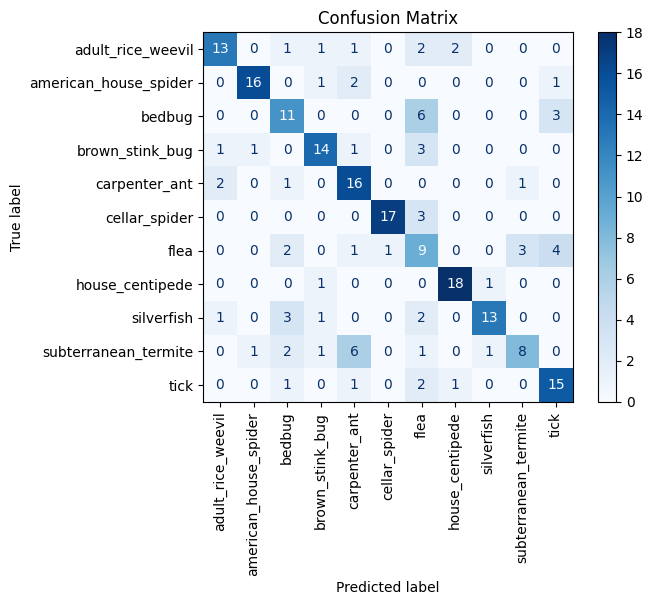

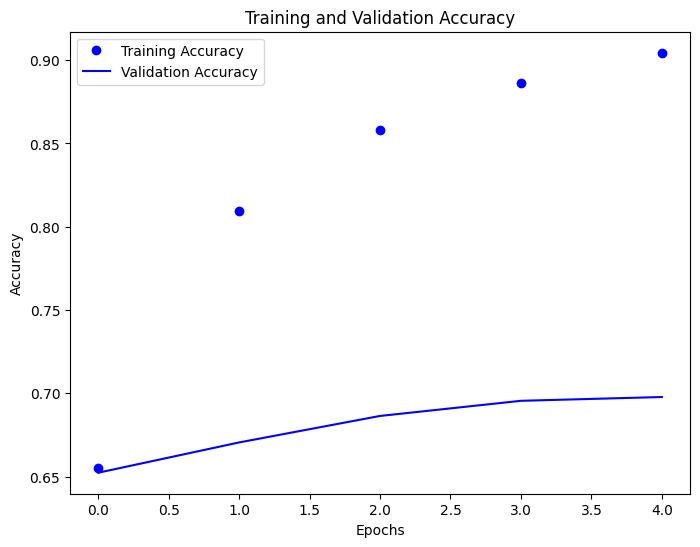

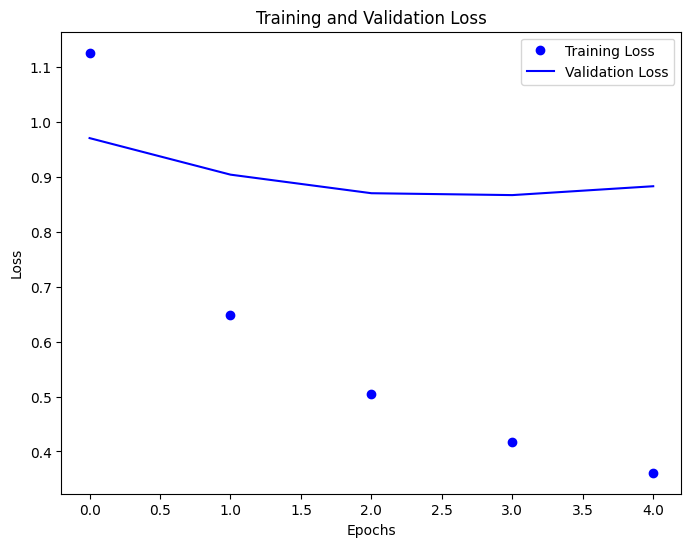

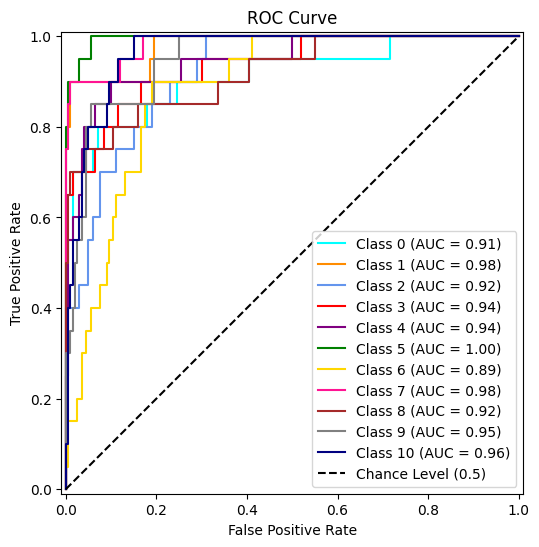

Macro-averaged One-vs-One ROC AUC score: 0.94
Accuracy: 0.682
Precision: 0.709
Recall: 0.682
F1 Score: 0.687


{'accuracy': 0.682,
 'precision': 0.709,
 'recall': 0.682,
 'f1_score': 0.687,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.764706  0.650000  0.702703   20.000000
 american_house_spider   0.888889  0.800000  0.842105   20.000000
 bedbug                  0.523810  0.550000  0.536585   20.000000
 brown_stink_bug         0.736842  0.700000  0.717949   20.000000
 carpenter_ant           0.571429  0.800000  0.666667   20.000000
 cellar_spider           0.944444  0.850000  0.894737   20.000000
 flea                    0.321429  0.450000  0.375000   20.000000
 house_centipede         0.857143  0.900000  0.878049   20.000000
 silverfish              0.866667  0.650000  0.742857   20.000000
 subterranean_termite    0.666667  0.400000  0.500000   20.000000
 tick                    0.652174  0.750000  0.697674   20.000000
 accuracy                0.681818  0.681818  0.681818    0.681818
 macro avg               0.708563  

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics for Xception: 'accuracy': 0.682, 'precision': 0.709, 'recall': 0.682,'f1_score': 0.687